# Problem 1

**Analyse retail sales data to identify trends, seasonal patterns, and product performance.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = "/content/Online Retail.xlsx"
df = pd.read_excel(path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##Count Unique Products

In [ ]:
df["Description"].nunique(), df["StockCode"].nunique(), df["CustomerID"].nunique()

(4223, 4070, 4372)

##Creating Total Column

In [ ]:
df["Total"] = df["Quantity"] * df["UnitPrice"]
df.head()
df[df["Total"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


##Trend - Total Sales

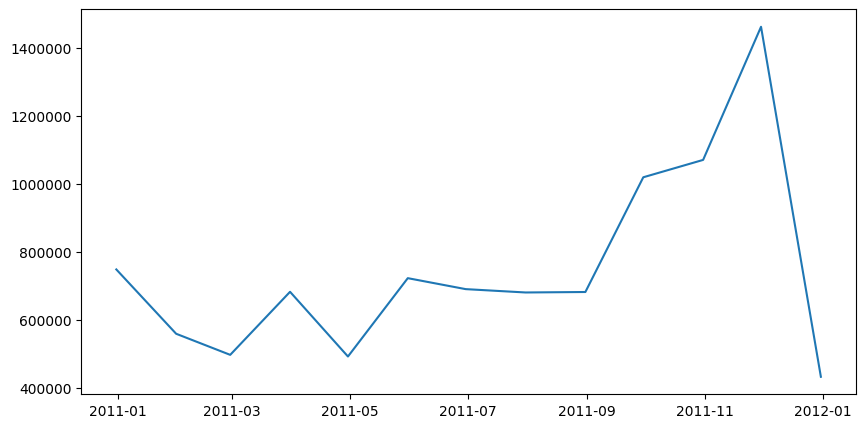

In [ ]:
df_grouped = df.groupby(by="InvoiceDate")["Total"].sum()
df_monthly = df_grouped.resample('M').sum()
df_monthly = pd.DataFrame(df_monthly)
_ = plt.figure(figsize=(10, 5))
plt.plot(df_monthly)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


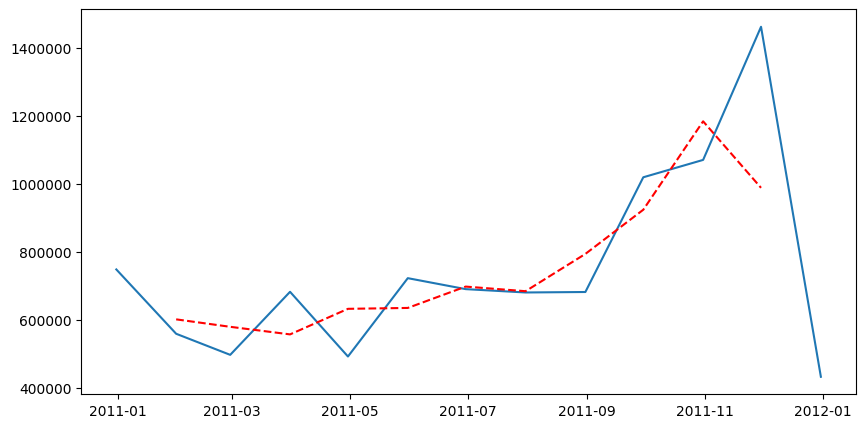

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['Total'])
plt.ticklabel_format(style='plain', axis='y')
monthly_trend = df_monthly['Total'].rolling(window=3, center=True).mean()
plt.plot(df_monthly.index, monthly_trend, "r--")
plt.show()

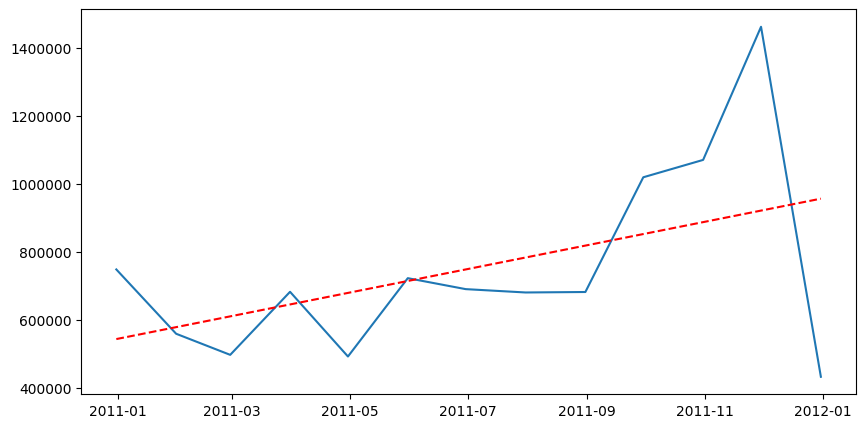

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['Total'])
plt.ticklabel_format(style='plain', axis='y')
z = np.polyfit(mdates.date2num(df_monthly.index), df_monthly['Total'], 1)
p = np.poly1d(z)
plt.plot(df_monthly.index, p(mdates.date2num(df_monthly.index)), "r--")
plt.show()

##Seasonality - Total Sales

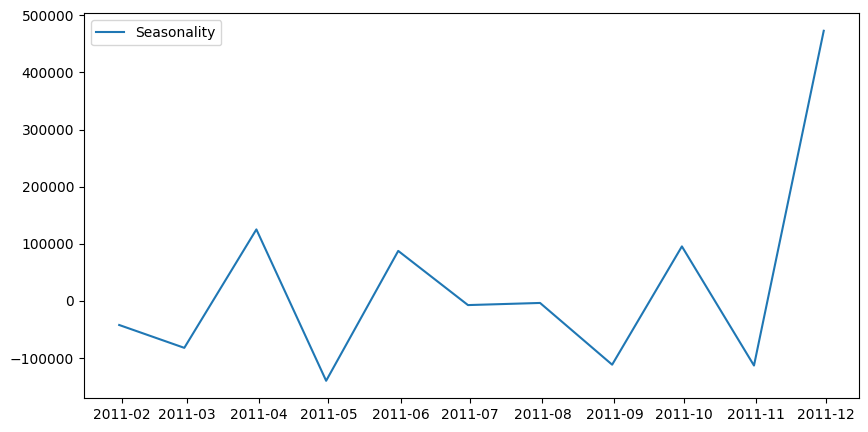

In [ ]:
monthly_trend = df_monthly['Total'].rolling(window=3, center=True).mean()
seasonality = df_monthly['Total'] - monthly_trend
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, seasonality, label="Seasonality")
plt.legend()
plt.show()

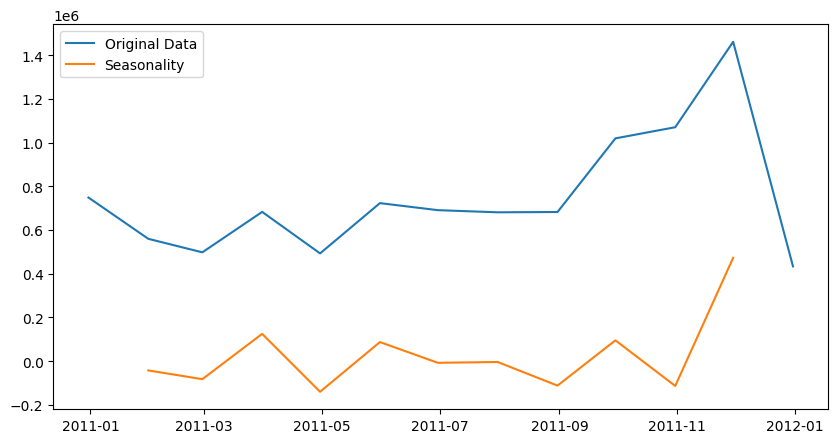

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly, label="Original Data")
plt.plot(df_monthly.index, seasonality, label="Seasonality")
plt.legend()
plt.show()

##Product - Performace

In [ ]:
df_bp = df.groupby(by="Description")["Total"].sum()
df_bp = pd.DataFrame(df_bp)
df_bp = df_bp.reset_index()
df_bp[df_bp["Total"] == df_bp["Total"].max()] # THis is the product that made the most revenue

,Description,Total
1098,DOTCOM POSTAGE,206245.48


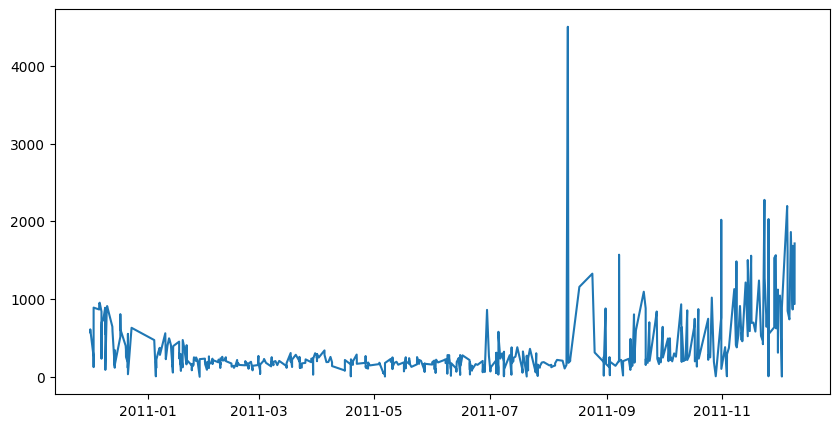

In [ ]:
df_bp1 = df[df["Description"] == "DOTCOM POSTAGE"]
plt.figure(figsize=(10, 5))
plt.plot(df_bp1["InvoiceDate"], df_bp1["Total"])
plt.show()

# Problem 2

**Explore patient data to identify trends in diseases, treatment effectiveness, or healthcare resource utilization.**

## Dataset not available anymore.

# Problem 3

**Analyze historical stock prices to identify market trends, volatilities, and potential investment opportunities.**

## Reading Data

In [ ]:
import yfinance as yf
START_DATE = "2015-01-08"
END_DATE = "2023-12-12"
TICKER = "AAPL"
price = yf.download([TICKER], start=START_DATE, end=END_DATE, interval="1mo")
price.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-02-01,29.512501,33.400002,29.020000,32.115002,28.747463,4546140800
2015-03-01,32.312500,32.570000,30.407499,31.107500,27.955502,4554568400
2015-04-01,31.205000,33.634998,30.775000,31.287500,28.117262,3984542000
2015-05-01,31.525000,33.242500,30.840000,32.570000,29.269812,3816608400
2015-06-01,32.570000,32.847500,31.120001,31.357500,28.297878,3514426800


## Trend

<ipython-input-151-0316dabcb8da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close.dropna(inplace=True)


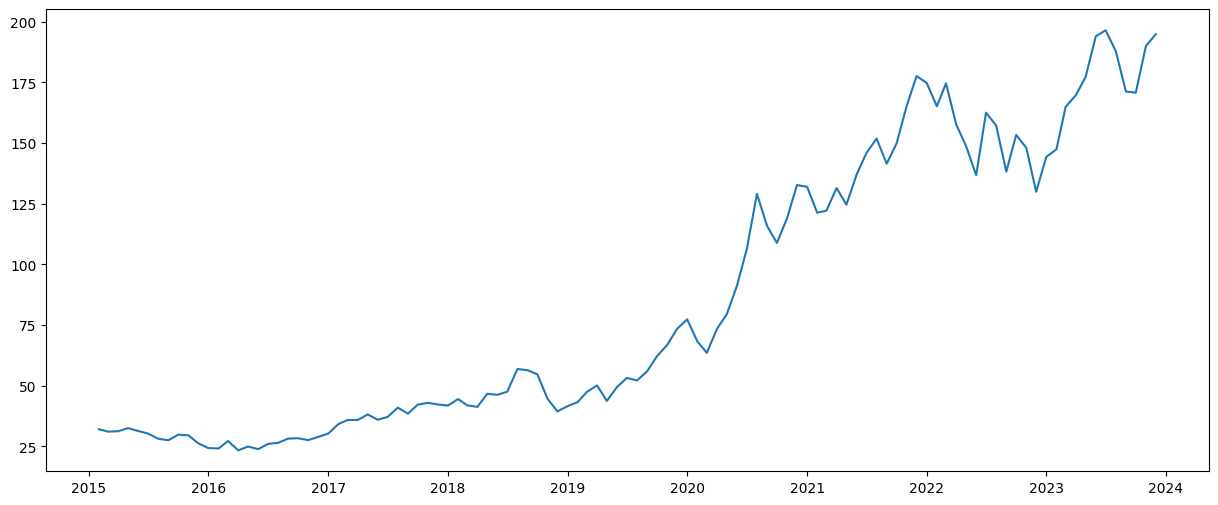

<ipython-input-151-0316dabcb8da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close.drop("Date", axis=1, inplace=True)


In [ ]:
price["Date"] = price.index
close = price[["Date", "Close"]]
close.dropna(inplace=True)
_ = plt.figure(figsize=(15, 6))
plt.plot(close["Date"], close["Close"])
plt.show()
close.set_index(close["Date"], inplace= True)
close.asfreq("M")
close.drop("Date", axis=1, inplace=True)
close.head()
validation = close.iloc[-6:]
close = close.iloc[:-6]

In [ ]:
import itertools
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
seasonl_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonl_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (0, 0, 4, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (0, 1, 4, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (0, 2, 3, 12),
 (0, 2, 4, 12),
 (0, 3, 0, 12),
 (0, 3, 1, 12),
 (0, 3, 2, 12),
 (0, 3, 3, 12),
 (0, 3, 4, 12),
 (0, 4, 0, 12),
 (0, 4, 1, 12),
 (0, 4, 2, 12),
 (0, 4, 3, 12),
 (0, 4, 4, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 0, 4, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (1, 1, 4, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (1, 2, 3, 12),
 (1, 2, 4, 12),
 (1, 3, 0, 12),
 (1, 3, 1, 12),
 (1, 3, 2, 12),
 (1, 3, 3, 12),
 (1, 3, 4, 12),
 (1, 4, 0, 12),
 (1, 4, 1, 12),
 (1, 4, 2, 12),
 (1, 4, 3, 12),
 (1, 4, 4, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 

In [ ]:
for param in pdq:
  for param_seasonal in seasonl_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(close,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
      results = model.fit(displ=False)
      print(f"ARIMA{param}x{param_seasonal}: AIC = {results.aic}")

    except Exception as e:
      continue

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(close,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 0, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0172      0.009    118.894      0.000       1.000       1.034
ma.L1          0.0126      0.080      0.158      0.874      -0.143       0.169
ar.S.L12       0.1343      0.829      0.162      0.871      -1.491       1.759
ma.S.L12       0.0118      0.880      0.013      0.989      -1.713       1.736
sigma2        71.3761     10.187      7.007      0.000      51.410      91.342


## Volatilities

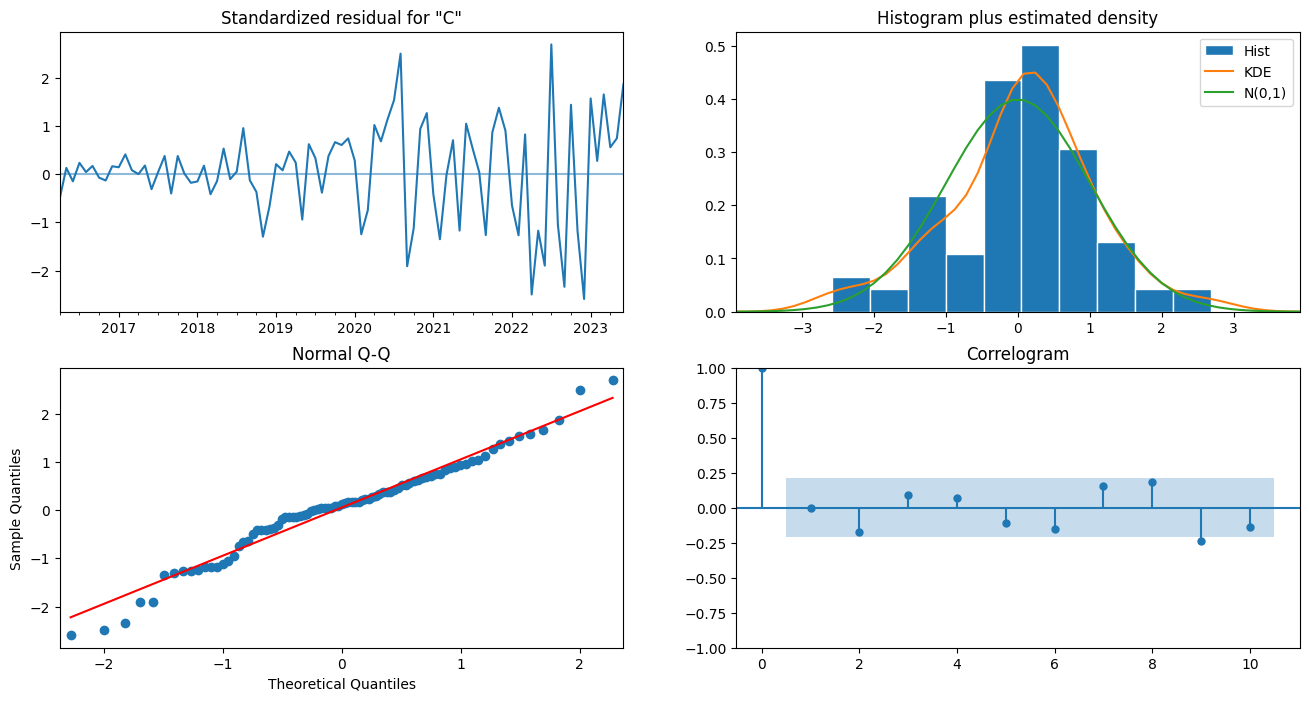

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Prediction

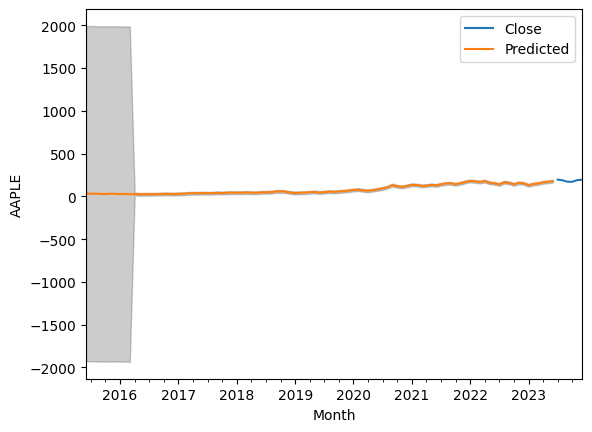

In [ ]:
predictions = results.get_prediction(start=pd.to_datetime("2015-06-01"))
prediction_ci = predictions.conf_int()

ax = validation.plot(label="Actual")
predictions.predicted_mean.plot(label="Predicted")

ax.fill_between(prediction_ci.index,
                prediction_ci.iloc[:, 0],
                prediction_ci.iloc[:, 1],
                color="k",
                alpha=0.2)
ax.set_xlabel("Month")
ax.set_ylabel("AAPLE")
plt.legend()
plt.show()

## Forecasting

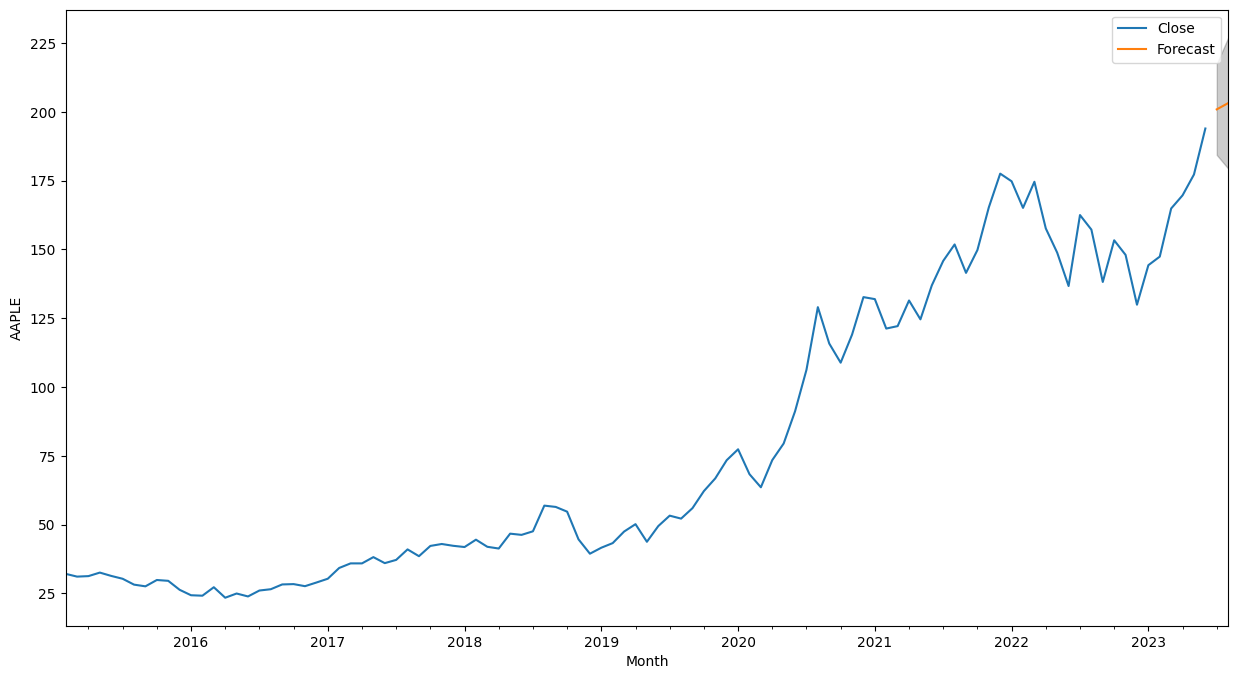

In [ ]:
forecast = results.get_forecast(steps=2)
forecast_ci = forecast.conf_int()

ax = close.plot(label="Real", figsize=(15, 8))
forecast.predicted_mean.plot(ax=ax, label="Forecast")
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color="k",
                alpha=0.2)
ax.set_xlabel("Month")
ax.set_ylabel("AAPLE")
plt.legend()
plt.show()